In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/Titanic_Data.csv')

In [3]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Embarked**
southampton(s), cherbourg(c) in France, Queenstown(Ireland)

**Data Visualization**

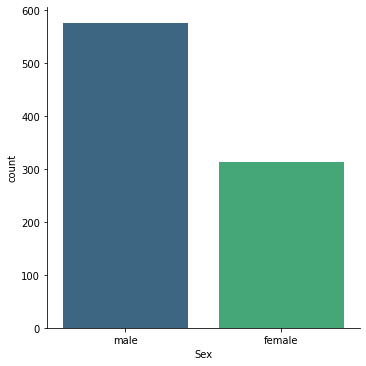

In [5]:
sns.catplot(x = 'Sex', kind = 'count', data = titanic_df, palette = 'viridis')

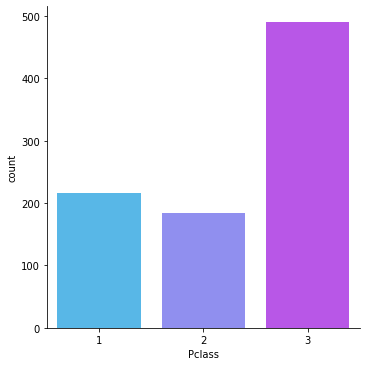

In [6]:
sns.catplot(x = 'Pclass', kind = 'count', data = titanic_df, palette = 'cool')

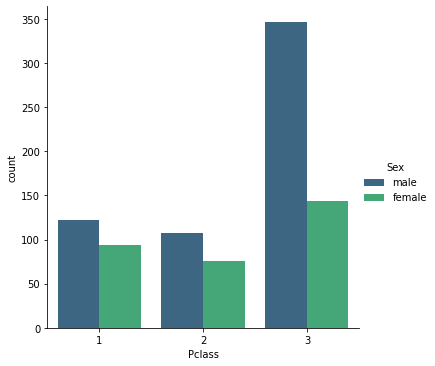

In [7]:
sns.catplot(x = 'Pclass', kind = 'count', hue = 'Sex', data = titanic_df, palette = 'viridis')

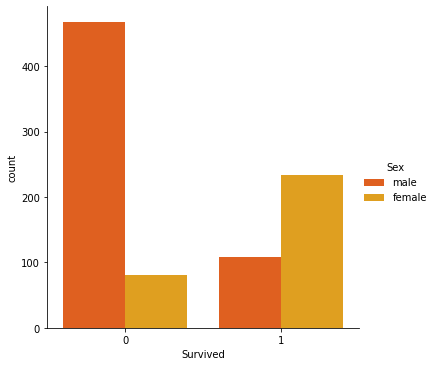

In [8]:
sns.catplot(x = 'Survived', kind = 'count', hue = 'Sex', data = titanic_df, palette = 'autumn')

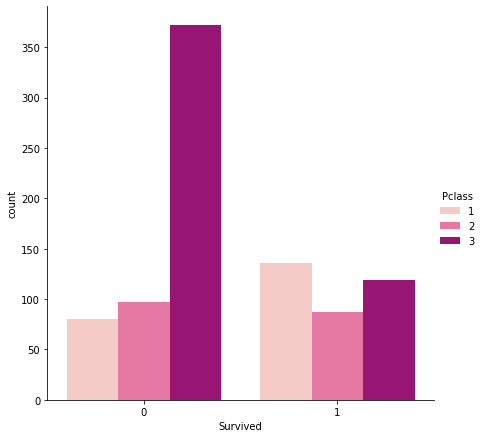

In [9]:
sns.catplot(x = 'Survived', kind = 'count', hue = 'Pclass', data = titanic_df, palette = 'RdPu', height = 6)

**Missing Values**

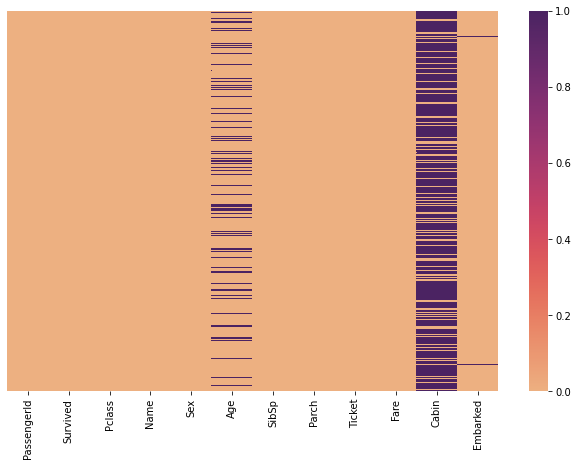

In [10]:
plt.figure(figsize = (11, 7))
sns.heatmap(titanic_df.isnull(), yticklabels = False, cmap = 'flare')

**Box Plot**

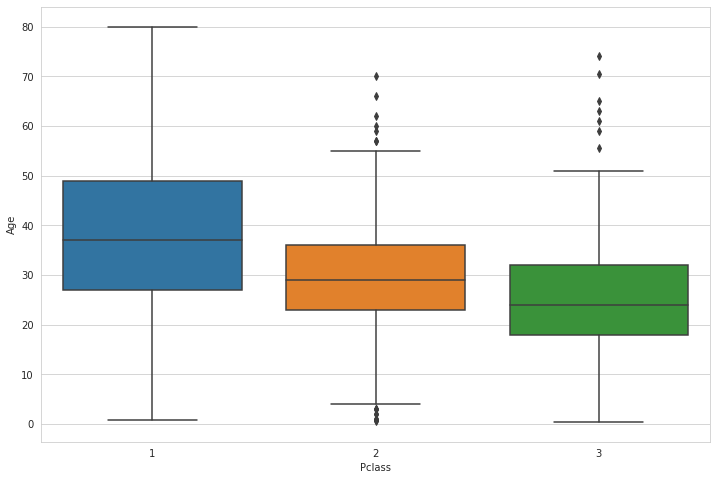

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic_df)

In [12]:
# UDF Imputer

def imputer_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age) :
    if Pclass == 1:
      return 37
    elif Pclass == 2 :
      return 29
    else :
      return 24
    
  else :
    return Age

In [13]:
# Apply function is used to apply Customized UDF 

titanic_df['Age'] = titanic_df[['Age', 'Pclass']].apply(imputer_age, axis = 1)

In [14]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
titanic_df.drop(['Cabin'], axis = 1, inplace = True)

In [16]:
titanic_df.dropna(inplace = True)

In [17]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
titanic_df.shape

(889, 11)

In [19]:
# Encoding 
sex = pd.get_dummies(titanic_df['Sex'])
embarked = pd.get_dummies(titanic_df['Embarked'])

In [20]:
titanic_df1 = pd.concat([titanic_df, sex, embarked], axis = 1)

In [21]:
titanic_df1.drop(['Name', 'Sex', 'Ticket', 'Embarked', 'female'], axis = 1,  inplace=True)

**Feature Selection**

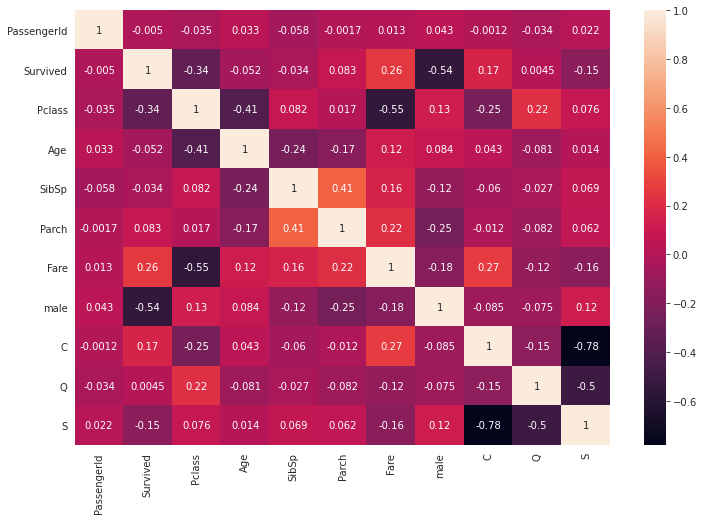

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(titanic_df1.corr(), annot = True)

In [23]:
titanic_df1.drop(['PassengerId'], axis = 1, inplace = True)

**Cross Validation**

In [24]:
X = titanic_df1.drop(['Survived'], axis = 1)
Y = titanic_df1['Survived']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train , Y_test = train_test_split(X , Y, test_size = 0.2, random_state = 5)

**Support Vector Machine (SVM)**

In [26]:
from sklearn.svm import SVC

**Kernal = Linear**

In [27]:
# C = Value of boundary (Higher The Better)

#model_l = SVC(kernel = 'linear')
#model_l.fit(X_train, Y_train)

In [28]:
#model_l.score(X_test, Y_test)

**Kernal = RBF**

In [29]:
#model_r = SVC(kernel = 'rbf')
#model_r.fit(X_train, Y_train)

In [30]:
#model_r.score(X_test, Y_test)

**Kernal = POLY**

In [ ]:
model = SVC(kernel = 'poly', degree = 2, gamma = 'auto')
model.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model.score(X_test, Y_test)

0.8651685393258427

**Kernal = Sigmoid**

In [ ]:
#model_s = SVC(kernel = 'sigmoid', gamma = 'auto')
#model_s.fit(X_train, Y_train)

In [ ]:
#model_s.score(X_test, Y_test)

**Classification Report**

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_test, predictions) 

array([[108,  11],
       [ 13,  46]])

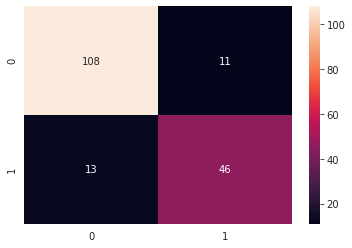

In [ ]:
sns.heatmap(confusion_matrix(Y_test, predictions), annot = True, fmt = '0.0f')

**Make Prediction**

In [ ]:
X_new = [[1,	25.0,	1,	0,	75.2500,	0,	1,	0,	0], [3,	22.0,	1,	0,	7.2500,	1,	1,	0,	0]]

In [ ]:
model.predict(X_new)

array([1, 0])